# Information on the exam

* First exam date: Friday, May 30, 2025 at 18.45. Location: HG 201 (main building)
* Second exam date: September 10, 2025 at 8.15. Location: HG 106, (main building)

*Part 4: Working with Text Data*
#The NLTK library#

In the last part of the tutorial we learned about string manipulation and regular expressions. In this tutorial we will take a look at how we can work with larger amounts of text data comfortably using the **NLTK library**. We will also have a quick look at wordclouds and if time allows some advanced topics.

## Analyzing text data with NLTK

Now that we know how to clean and prepare text data, we can start to work with it. There are two popular libraries that allow you to do this: ``NLTK`` and ``spacy``. In this tutorial, we will focus on NLTK (Natural Language Toolkit).

Let's first fetch the text from the cat page on Wikipedia so we have an example text to work with:

In [1]:
# Import modules
import re
import requests
from bs4 import BeautifulSoup as bs

# Get page and convert to json
r = requests.get("https://en.wikipedia.org/w/api.php?action=parse&page=Cat&format=json").json()

# Get text and convert to BeautifulSoup object
r_text = r["parse"]["text"]["*"]
soup = bs(r_text)

# Get list of all paragraphs
pars = soup.find_all("p")

# Remove HTML tags (get text)
pars = [par.get_text() for par in pars]

# Join paragraphs to one string
myString = ' '.join(pars)

# Convert string to lower case and remove citations
myString = myString.lower()
myString = re.sub(r"\[\d+\]", "", myString)

The first few lines of the text look as follows:

In [2]:
myString[:500]

'\n the cat (felis catus), also referred to as the domestic cat or house cat, is a small domesticated carnivorous mammal. it is the only domesticated species of the family felidae. advances in archaeology and genetics have shown that the domestication of the cat occurred in the near east around 7500 bc. it is commonly kept as a pet and working cat, but also ranges freely as a feral cat avoiding human contact. it is valued by humans for companionship and its ability to kill vermin. its retractable '

Let's now **import the NLTK library** so we can work with this text.

In [3]:
# If you don't work on Colab: pip install nltk
import nltk

The NLTK library comes with many resources (e.g. a large collection of books) and packages that you need to download if you want to work with them. Let's **download the most popular ones**:

In [4]:
nltk.download('popular')
nltk.download('punkt_tab')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Raphael\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Raphael\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Raphael\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Raphael\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Raphael\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\Raphael\AppDat

True

###Tokenization

A first thing you may want to do is to split your text into different components – usually words. This is called **tokenization**. NLTK has a series of tokenizers that allow you to do this conveniently. You can think of them as more sophisticated versions of the ``split()`` method. **To separate all the words, you can use the ``word_tokenize`` method**:

In [6]:
from nltk.tokenize import word_tokenize

In [7]:
tokens = word_tokenize(myString)
print(tokens)

['the', 'cat', '(', 'felis', 'catus', ')', ',', 'also', 'referred', 'to', 'as', 'the', 'domestic', 'cat', 'or', 'house', 'cat', ',', 'is', 'a', 'small', 'domesticated', 'carnivorous', 'mammal', '.', 'it', 'is', 'the', 'only', 'domesticated', 'species', 'of', 'the', 'family', 'felidae', '.', 'advances', 'in', 'archaeology', 'and', 'genetics', 'have', 'shown', 'that', 'the', 'domestication', 'of', 'the', 'cat', 'occurred', 'in', 'the', 'near', 'east', 'around', '7500', 'bc', '.', 'it', 'is', 'commonly', 'kept', 'as', 'a', 'pet', 'and', 'working', 'cat', ',', 'but', 'also', 'ranges', 'freely', 'as', 'a', 'feral', 'cat', 'avoiding', 'human', 'contact', '.', 'it', 'is', 'valued', 'by', 'humans', 'for', 'companionship', 'and', 'its', 'ability', 'to', 'kill', 'vermin', '.', 'its', 'retractable', 'claws', 'are', 'adapted', 'to', 'killing', 'small', 'prey', 'species', 'such', 'as', 'mice', 'and', 'rats', '.', 'it', 'has', 'a', 'strong', ',', 'flexible', 'body', ',', 'quick', 'reflexes', ',', 'a

As you can see, we now have a list with all the words where punctuation is treated as a separate token. This list can now be converted into an **nltk Text object**:

In [8]:
text = nltk.Text(tokens)
print(text)
type(text)

<Text: the cat ( felis catus ) , also...>


nltk.text.Text

There are many useful functions and methods you can apply to these ``Text`` objects. We will now get to know a few of them.

### Keywords in context

In [9]:
text.concordance("cat")

Displaying 25 of 122 matches:
                                  the cat ( felis catus ) , also referred to as
 ) , also referred to as the domestic cat or house cat , is a small domesticate
erred to as the domestic cat or house cat , is a small domesticated carnivorous
e shown that the domestication of the cat occurred in the near east around 7500
is commonly kept as a pet and working cat , but also ranges freely as a feral c
t , but also ranges freely as a feral cat avoiding human contact . it is valued
y hunter and a crepuscular predator . cat intelligence is evident in their abil
omparable to those of a young child . cat communication includes meowing , purr
. domestic cats are bred and shown at cat fancy events as registered pedigreed 
donment has exploded the global feral cat population , which has driven the ext
in china . the united states leads in cat ownership with 73.8 million cats . in
pets . the origin of the english word cat , old english catt , is thought to be
poeia from

### Collocations/Multiwords

In [10]:
text.collocation_list()
# you might want to have a look at MWETokenizer to deal with multiwords

[('domestic', 'cat'),
 ('domestic', 'cats'),
 ('united', 'states'),
 ('felis', 'catus'),
 ('years', 'ago'),
 ('amino', 'acids'),
 ('feral', 'cats'),
 ('new', 'zealand'),
 ('african', 'wildcat'),
 ('taste', 'buds'),
 ('united', 'kingdom'),
 ('one', 'study'),
 ('body', 'language'),
 ('chinese', 'mountain'),
 ('gave', 'birth'),
 ('john', 'heywood'),
 ('magna', 'graecia'),
 ('roman', 'empire'),
 ('solve', 'problems'),
 ('temperate', 'zones')]

### Word frequencies

A first thing we may want to know is how frequent the different words are. You can use the **``count`` method to get the frequency for a particular word**:

In [11]:
text.count("cat")

122

But what if we wanted to have the **frequencies for all the words**? We can obtain them using the **``FreqDist`` function**:

In [12]:
fdist = nltk.FreqDist(text)

In [13]:
fdist

FreqDist({',': 475, '.': 383, 'the': 367, 'and': 239, 'of': 232, 'to': 216, 'a': 184, 'in': 182, 'cats': 176, 'cat': 122, ...})

In [14]:
type(fdist)

nltk.probability.FreqDist

We got a FreqDist object that looks like a dictionary and contains all the words in our vocabulary and the number of times they ocurr in our corpus. We can treat this object like a dictionary. For example, its keys correspond to our vocabulary:



In [15]:
vocabulary = fdist.keys()
print(vocabulary)

dict_keys(['the', 'cat', '(', 'felis', 'catus', ')', ',', 'also', 'referred', 'to', 'as', 'domestic', 'or', 'house', 'is', 'a', 'small', 'domesticated', 'carnivorous', 'mammal', '.', 'it', 'only', 'species', 'of', 'family', 'felidae', 'advances', 'in', 'archaeology', 'and', 'genetics', 'have', 'shown', 'that', 'domestication', 'occurred', 'near', 'east', 'around', '7500', 'bc', 'commonly', 'kept', 'pet', 'working', 'but', 'ranges', 'freely', 'feral', 'avoiding', 'human', 'contact', 'valued', 'by', 'humans', 'for', 'companionship', 'its', 'ability', 'kill', 'vermin', 'retractable', 'claws', 'are', 'adapted', 'killing', 'prey', 'such', 'mice', 'rats', 'has', 'strong', 'flexible', 'body', 'quick', 'reflexes', 'sharp', 'teeth', 'night', 'vision', 'sense', 'smell', 'well', 'developed', 'social', 'solitary', 'hunter', 'crepuscular', 'predator', 'intelligence', 'evident', 'their', 'adapt', 'learn', 'through', 'observation', 'solve', 'problems', 'research', 'they', 'possess', 'memories', 'exhi

If we would like to know the **most common words**, we can apply the **``most_common`` method** to the FreqDist object:

In [16]:
fdist.most_common(20)

[(',', 475),
 ('.', 383),
 ('the', 367),
 ('and', 239),
 ('of', 232),
 ('to', 216),
 ('a', 184),
 ('in', 182),
 ('cats', 176),
 ('cat', 122),
 ('are', 100),
 ('as', 93),
 ('is', 87),
 ('that', 62),
 ('with', 62),
 ('their', 60),
 ('(', 57),
 (')', 57),
 ('domestic', 56),
 ('have', 54)]

We can also **plot the most common words using the ``plot`` method**:

<Axes: xlabel='Samples', ylabel='Counts'>

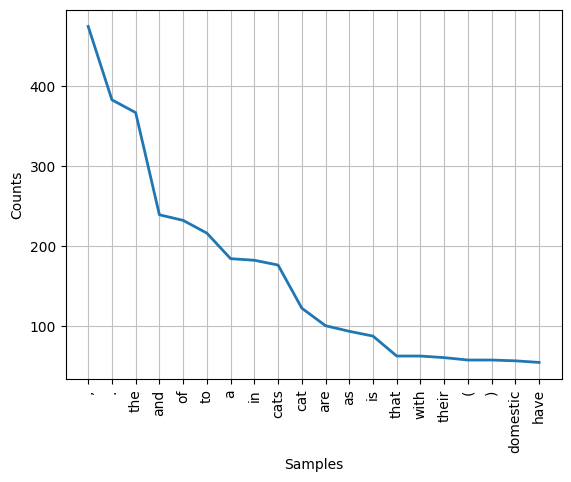

In [17]:
fdist.plot(20)

### Stop words

You may have noticed that the statistics we computed about the most common words are not very informative. Almost all of the most common tokens are words such as "the", "and" or "to" that do not tell you anything about the content of the text.

Such words are called **stop words** and they are usually removed from a corpus for text analysis. You could define the words you would like to remove on your own, but NLTK has pre-defined lists for many laguanges that you can use (you will also find more such lists online). Let's import the list of English stop words:

In [18]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
len(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

198

Let's remove these words:

In [19]:
print(tokens)
tokens = [w for w in tokens if not w in stop_words]
print(tokens)

['the', 'cat', '(', 'felis', 'catus', ')', ',', 'also', 'referred', 'to', 'as', 'the', 'domestic', 'cat', 'or', 'house', 'cat', ',', 'is', 'a', 'small', 'domesticated', 'carnivorous', 'mammal', '.', 'it', 'is', 'the', 'only', 'domesticated', 'species', 'of', 'the', 'family', 'felidae', '.', 'advances', 'in', 'archaeology', 'and', 'genetics', 'have', 'shown', 'that', 'the', 'domestication', 'of', 'the', 'cat', 'occurred', 'in', 'the', 'near', 'east', 'around', '7500', 'bc', '.', 'it', 'is', 'commonly', 'kept', 'as', 'a', 'pet', 'and', 'working', 'cat', ',', 'but', 'also', 'ranges', 'freely', 'as', 'a', 'feral', 'cat', 'avoiding', 'human', 'contact', '.', 'it', 'is', 'valued', 'by', 'humans', 'for', 'companionship', 'and', 'its', 'ability', 'to', 'kill', 'vermin', '.', 'its', 'retractable', 'claws', 'are', 'adapted', 'to', 'killing', 'small', 'prey', 'species', 'such', 'as', 'mice', 'and', 'rats', '.', 'it', 'has', 'a', 'strong', ',', 'flexible', 'body', ',', 'quick', 'reflexes', ',', 'a

We may want to remove the punctuation too:

In [20]:
punctuation = [punc for punc in "[]!?.,:;—()\"\'’`‘"]
tokens = [w for w in tokens if not w in punctuation]
print(tokens)
# Note: This could also be done on the original string (myString) using a regex!

['cat', 'felis', 'catus', 'also', 'referred', 'domestic', 'cat', 'house', 'cat', 'small', 'domesticated', 'carnivorous', 'mammal', 'domesticated', 'species', 'family', 'felidae', 'advances', 'archaeology', 'genetics', 'shown', 'domestication', 'cat', 'occurred', 'near', 'east', 'around', '7500', 'bc', 'commonly', 'kept', 'pet', 'working', 'cat', 'also', 'ranges', 'freely', 'feral', 'cat', 'avoiding', 'human', 'contact', 'valued', 'humans', 'companionship', 'ability', 'kill', 'vermin', 'retractable', 'claws', 'adapted', 'killing', 'small', 'prey', 'species', 'mice', 'rats', 'strong', 'flexible', 'body', 'quick', 'reflexes', 'sharp', 'teeth', 'night', 'vision', 'sense', 'smell', 'well', 'developed', 'social', 'species', 'solitary', 'hunter', 'crepuscular', 'predator', 'cat', 'intelligence', 'evident', 'ability', 'adapt', 'learn', 'observation', 'solve', 'problems', 'research', 'shown', 'possess', 'strong', 'memories', 'exhibit', 'neuroplasticity', 'display', 'cognitive', 'skills', 'compa

Let's see if we get more interesting word frequency results after removing the stop words:

<Axes: xlabel='Samples', ylabel='Counts'>

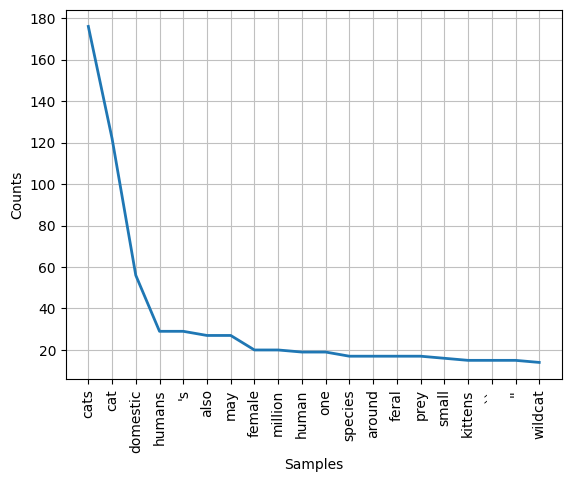

In [21]:
text = nltk.Text(tokens)
fdist = nltk.FreqDist(text)
fdist.plot(20)

We may still have to do some more cleaning, but this already looks much better!


### Stemming

You may have noticed that "cat" and "cats" were treated as two different words. However, they are just different inflections of the same root. If you want to reduce words to their root form, you can use **stemming**. The NLTK library allows you to work with different stemmers. Let's look at two examples: the Porter stemmer and the Lancaster stemmer:

In [22]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
ps = PorterStemmer()
lan = LancasterStemmer()

In [23]:
print(ps.stem("cats"))
print(lan.stem("cats"))

cat
cat


In [26]:
words = ["give", "gives", "giving", "gave", "given"]
[ps.stem(word) for word in words]

['give', 'give', 'give', 'gave', 'given']

In [27]:
[lan.stem(word) for word in words]

['giv', 'giv', 'giv', 'gav', 'giv']

As you can see, the two stemmers work a bit differently. The Lancaster stemmer tends to be more aggressive (see last word).

><font color = ffffff> SIDENOTE: Appart from stemming, we can also do **lemmatization**, where the context of a word is taken into account to generate an appropriate root form. If you want to know more about stemming and lemmatization, see, for example:
* https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

Let's combine these methods:

<Axes: xlabel='Samples', ylabel='Counts'>

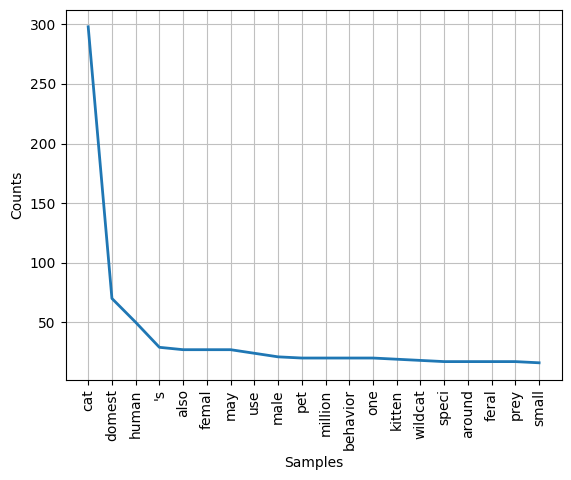

In [28]:
tokens = [w for w in tokens if not w in stop_words]
punctuation = [punc for punc in "[]!?.,:;—()\"\'’`‘"]
tokens = [w for w in tokens if not w in punctuation]
stemmed_text = [ps.stem(word) for word in tokens]
fdist = nltk.FreqDist(stemmed_text)
fdist.plot(20)

You see that still some work might be needed. Text analysis often is a "back and forth" between analyzing and cleaning as insufficient cleaning may show up only very late in your analyses.

### Part-of-speech tagging

The NLTK library allows you to easily implement many sopisticated Natural Langauge Processing tasks. For example, you can do  **part-of-speech tagging**.

In [29]:
nltk.download('averaged_perceptron_tagger_eng')
tags = nltk.pos_tag(text)
print(tags)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Raphael\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


[('cat', 'NN'), ('felis', 'NN'), ('catus', 'NN'), ('also', 'RB'), ('referred', 'VBD'), ('domestic', 'JJ'), ('cat', 'NN'), ('house', 'NN'), ('cat', 'NN'), ('small', 'JJ'), ('domesticated', 'VBD'), ('carnivorous', 'JJ'), ('mammal', 'NN'), ('domesticated', 'VBD'), ('species', 'NNS'), ('family', 'NN'), ('felidae', 'NN'), ('advances', 'NNS'), ('archaeology', 'VBP'), ('genetics', 'NNS'), ('shown', 'VBN'), ('domestication', 'NN'), ('cat', 'NN'), ('occurred', 'VBD'), ('near', 'IN'), ('east', 'NN'), ('around', 'IN'), ('7500', 'CD'), ('bc', 'NN'), ('commonly', 'RB'), ('kept', 'VBD'), ('pet', 'JJ'), ('working', 'VBG'), ('cat', 'NN'), ('also', 'RB'), ('ranges', 'VBZ'), ('freely', 'RB'), ('feral', 'JJ'), ('cat', 'NN'), ('avoiding', 'VBG'), ('human', 'JJ'), ('contact', 'NN'), ('valued', 'VBN'), ('humans', 'NNS'), ('companionship', 'VBP'), ('ability', 'NN'), ('kill', 'NN'), ('vermin', 'FW'), ('retractable', 'JJ'), ('claws', 'NNS'), ('adapted', 'VBD'), ('killing', 'VBG'), ('small', 'JJ'), ('prey', 'NN

In one line of code, all the words in your corpus were classified into their word groups (e.g. nouns = NN, adjectives = JJ, verbs = VB etc.)! This can be very useful. For example, you may only be interested in the nouns within your text:

In [30]:
nouns = [tag[0] for tag in tags if tag[1] == "NN"]
print(nouns)

['cat', 'felis', 'catus', 'cat', 'house', 'cat', 'mammal', 'family', 'felidae', 'domestication', 'cat', 'east', 'bc', 'cat', 'cat', 'contact', 'ability', 'kill', 'prey', 'body', 'night', 'vision', 'sense', 'smell', 'hunter', 'predator', 'cat', 'intelligence', 'ability', 'adapt', 'observation', 'research', 'possess', 'display', 'child', 'cat', 'communication', 'body', 'language', 'frequency', 'spring', 'autumn', 'temperate', 'year', 'pedigreed', 'control', 'abandonment', 'cat', 'population', 'bird', 'mammal', 'reptile', 'globe', 'popularity', 'region', 'reside', 'asia', 'ownership', 'kingdom', 'word', 'cat', 'catt', 'word', 'cattus', 'century', 'word', 'language', 'word', 'kaddîska', 'wildcat', 'nobiin', 'kadīs', 'word', 'syriac', 'word', 'cf', 'sámi', 'gáđfi', 'stoat', 'hölgy', 'stoat', 'female', 'puss', 'pussycat', 'century', 'dutch', 'puuskatte', 'kattepus', 'pus', 'pusekatt', 'puižė', 'puisín', 'puiscín', 'etymology', 'cat', 'male', 'cat', 'tomcat', 'gib', 'female', 'cycle', 'juveni

There is much more you can do with the NLTK library. Check out the documentation to find out: https://www.nltk.org/book/

>  <font color='teal'> **In-class exercise**: Consider the the following string that contains the entire text of the book "David Copperfield" from Charles Dickens (downloaded from the website of project Gutenberg):

In [31]:
import re
import requests
from bs4 import BeautifulSoup as bs

r = requests.get("https://www.gutenberg.org/files/766/766-h/766-h.htm")
# Specify encoding when reading the response content
r.encoding = 'utf-8'
soup = bs(r.text, 'html.parser', from_encoding='latin-1')
pars = soup.find_all("p")
pars = [par.get_text() for par in pars]
david = ' '.join(pars)
david = david.lower()
david = re.sub(r"[^\w\s-]", "", david)
david[20000:21000]

C:\Users\Raphael\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\bs4\__init__.py:339: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn(


' again\r\n \r\nyoull make yourself ill said miss betsey and you\r\nknow that will not be good either for you or for my god-daughter come you\r\nmustnt do it\r\n \r\nthis argument had some share in quieting my mother though her increasing\r\nindisposition had a larger one there was an interval of silence only broken\r\nby miss betseys occasionally ejaculating ha as she sat\r\nwith her feet upon the fender\r\n \r\ndavid had bought an annuity for himself with his money i know\r\nsaid she by and by what did he do for you\r\n \r\nmr copperfield said my mother answering with some difficulty\r\nwas so considerate and good as to secure the reversion of a part of it\r\nto me\r\n \r\nhow much asked miss betsey\r\n \r\na hundred and five pounds a year said my mother\r\n \r\nhe might have done worse said my aunt\r\n \r\nthe word was appropriate to the moment my mother was so much worse that\r\npeggotty coming in with the teaboard and candles and seeing at a glance how\r\nill she wasas miss betsey

>  <font color='teal'> Tokenize the text and assign the resulting list to a variable named ``david_tokens``.

In [32]:
david_tokens = word_tokenize(david)
david_tokens

['affectionately',
 'inscribed',
 'to',
 'the',
 'hon',
 'mr',
 'and',
 'mrs',
 'richard',
 'watson',
 'of',
 'rockingham',
 'northamptonshire',
 'i',
 'do',
 'not',
 'find',
 'it',
 'easy',
 'to',
 'get',
 'sufficiently',
 'far',
 'away',
 'from',
 'this',
 'book',
 'in',
 'the',
 'first',
 'sensations',
 'of',
 'having',
 'finished',
 'it',
 'to',
 'refer',
 'to',
 'it',
 'with',
 'the',
 'composure',
 'which',
 'this',
 'formal',
 'heading',
 'would',
 'seem',
 'to',
 'require',
 'my',
 'interest',
 'in',
 'it',
 'is',
 'so',
 'recent',
 'and',
 'strong',
 'and',
 'my',
 'mind',
 'is',
 'so',
 'divided',
 'between',
 'pleasure',
 'and',
 'regretpleasure',
 'in',
 'the',
 'achievement',
 'of',
 'a',
 'long',
 'design',
 'regret',
 'in',
 'the',
 'separation',
 'from',
 'many',
 'companionsthat',
 'i',
 'am',
 'in',
 'danger',
 'of',
 'wearying',
 'the',
 'reader',
 'whom',
 'i',
 'love',
 'with',
 'personal',
 'confidences',
 'and',
 'private',
 'emotions',
 'besides',
 'which',
 'al

>  <font color='teal'> Remove the stopwords and create an NLTK text object.

In [35]:
david_tokens = [w for w in david_tokens if not w in stop_words]
david_text = nltk.Text(david_tokens)
david_text

<Text: affectionately inscribed hon mr mrs richard watson rockingham...>

>  <font color='teal'>Print the 30 most common words in the corpus.

In [37]:
david_fdist = nltk.FreqDist(david_text)
david_fdist.most_common(30)

[('said', 2941),
 ('mr', 2468),
 ('little', 1088),
 ('would', 992),
 ('one', 887),
 ('could', 858),
 ('upon', 798),
 ('know', 783),
 ('micawber', 769),
 ('aunt', 752),
 ('miss', 710),
 ('peggotty', 701),
 ('mrs', 671),
 ('never', 660),
 ('much', 651),
 ('time', 641),
 ('old', 624),
 ('made', 620),
 ('like', 604),
 ('say', 600),
 ('think', 582),
 ('dear', 568),
 ('come', 562),
 ('see', 550),
 ('well', 550),
 ('us', 549),
 ('went', 549),
 ('good', 531),
 ('copperfield', 509),
 ('dont', 503)]

## Creating word clouds

One nice way of visualizing text data is through **word clouds**. Run the following code to get a text corpus we can work with:

In [38]:
r = requests.get("https://en.wikipedia.org/w/api.php?action=parse&page=Sustainable_Development_Goals&format=json").json()
r_text = r["parse"]["text"]["*"]
soup = bs(r_text)
pars = soup.find_all("p")
pars = [par.get_text() for par in pars]
myString = ' '.join(pars)
myString = myString.lower()
myString = re.sub(r"[^\w\s-]", "", myString)

In [39]:
myString

'\n the 2030 agenda for sustainable development adopted by all united nations un members in 2015 created 17 world sustainable development goals sdgs the aim of these global goals is peace and prosperity for people and the planet12  while tackling climate change and working to preserve oceans and forests the sdgs highlight the connections between the environmental social and economic aspects of sustainable development sustainability is at the center of the sdgs as the term sustainable development implies\n these goals are ambitiousaccording to whom and the reports and outcomes to date indicate a challenging path most if not all of the goals are unlikely to be met by 2030 rising inequalities climate change and biodiversity loss are topics of concerns threatening progress the covid-19 pandemic in 2020 to 2023 made these challenges worse and some regions such as asia have experienced significant setbacks during that time\n there are cross-cutting issues and synergies between the different 

### Creating simple word clouds

Now we are ready to get started. Let's first import the modules we are going to use. From the **``wordcloud`` library** we have to import the ``WordCloud`` class and a list of stopwords (you could also import the stopwords from ``nltk``). The ``wordcloud`` library  **builds on top of ``matplotlib``**, which is why we will import it too:

In [40]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Raphael\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS  # Could also take stopwords from nltk!
len(STOPWORDS) # 192 stopwords

192

We can now create a ``WordCloud`` object:

In [42]:
wc = WordCloud(stopwords=STOPWORDS)
type(wc)

wordcloud.wordcloud.WordCloud

To take a look at the word cloud, we must first **generate** it and then **show** the resulting image using the ``imshow`` function from matplotlib.pyplot:

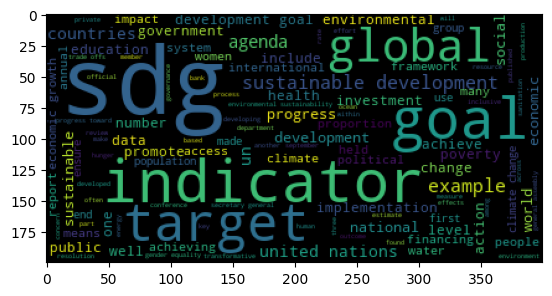

In [43]:
wc.generate(myString)
plt.imshow(wc)

And here we have our word cloud! There are many things you can **customize** (see here for the documentation: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html). Let's change the background color and the size of the plot and remove the axes. We will also set a *random state* (seed of the random number generator) so that the same image is produced each time we run our script (you can choose any number):

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

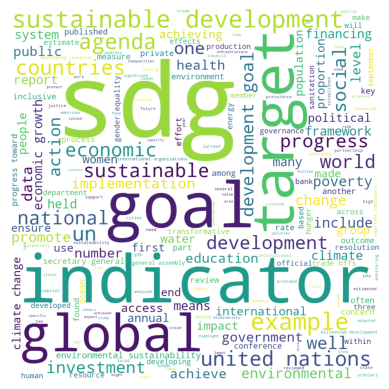

In [45]:
wc = WordCloud(background_color = "white", stopwords=STOPWORDS,
               width=1000, height=1000, random_state=634)
wc.generate(myString)
plt.imshow(wc)
plt.axis("off")

If we want to export our word cloud to our computer, we can use the ``to_file`` method:

In [46]:
wc.to_file("sdgs.png")

### Creating word clouds with custom masks

We can also create word clouds in non-rectangular shapes. This is done using **masks**, meaning that we need to define a shape that will be masked out from the word cloud. To be able to do this, we will need to import the ``Image`` module:

In [47]:
from PIL import Image

Now you can use this module to import an image of a shape you would like to mask. For example, we can import this image we found in the internet and convert it to a numpy array:

In [51]:
import os
os.chdir("../4_Data")

In [52]:
import numpy as np

# Solution 1: Retrieve image through url with requests
#from io import BytesIO
#url = "https://www.dreamalittlebigger.com/wp-content/uploads/2014/01/cat-shape-dreamalittlebigger.jpg"
#response = requests.get(url, stream=True)
#response.raise_for_status()  # Raise an exception for non-200 status codes
#image = Image.open(BytesIO(response.content)) # Open the image using BytesIO
#my_mask = np.array(image)

# Solution 2: Open image from your Drive (you need to place it there!)
my_mask = np.array(Image.open("images/shape1.jpg"))

In [53]:
my_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [54]:
my_mask.shape

(1396, 1980, 3)

As you can see, we got a three-dimensional array where the first two dimensions locate the pixels in the image while the third dimension corresponds to the three color channels. We can also take a look at the image using matplotlib:

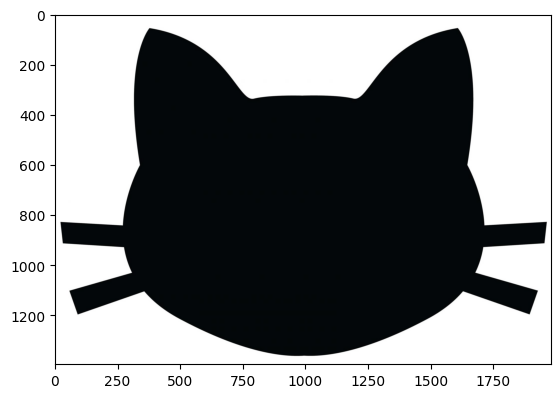

In [55]:
plt.imshow(my_mask)

How can we use this image to define the shape of our word cloud? When generating the word clouds, **all white entries will be masked out**. In the RGB color scheme, ``rgb(255, 255, 255)`` corresponds to white (``rgb(0, 0, 0)`` would correspond to black). Depending on your image, the values you want to mask out may not be perfectly white:

In [56]:
np.unique(my_mask, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

We can fix this easily:

In [57]:
my_mask[my_mask>20] = 255 # Set any number you consider appropriate as the boundary

Now we can create our world cloud simply by providing our mask as a further argument:

(np.float64(-0.5), np.float64(1979.5), np.float64(1395.5), np.float64(-0.5))

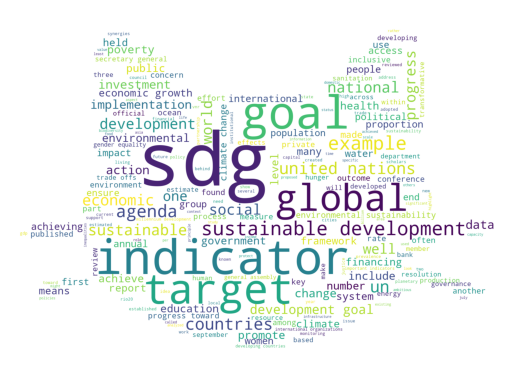

In [58]:
wc = WordCloud(background_color = "white",
               stopwords=STOPWORDS, mask=my_mask,
               random_state=1)
wc.generate(myString)
plt.imshow(wc)
plt.axis("off")

We can also draw the contour of our plot. Let's do this with another image:

In [59]:
url = "https://drive.google.com/uc?export=download&id=1K-QGOcXnuNTTfBVsZRjTfTRbeYDEIcN4"
mask = np.array(Image.open(requests.get(url, stream=True).raw))

# Or: mask = np.array(Image.open("images/shape2.png"))

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

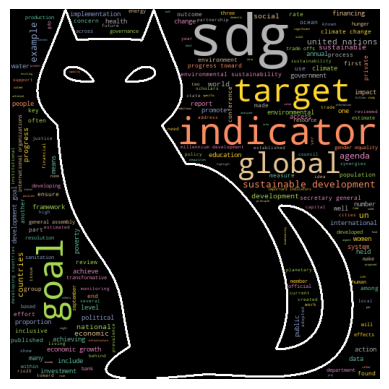

In [60]:
mask[mask>20] = 255

wc = WordCloud(background_color = "black",
               stopwords=STOPWORDS, mask=mask,
               random_state=3, colormap="Set2",
               contour_width = 3,
               contour_color="white")
wc.generate(myString)
plt.imshow(wc)
plt.axis("off")



---


>  <font color='teal'> **In-class exercise**: Retrieve a page of your choice from Wikipedia and create a wordcloud about it:

## Where to go from here?

I can only give you a rough overview on the topic of text analysis but based on what you already know, it is quite easy to continue in different directions.



### Sentiment Analysis

One easy way to determine the sentiment of a text is provided by the "VADER lexicon", which is a rule-based tool, designed to work for short texts like social media posts.

In [61]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Some test strings
nice_one = "I love python! The best feature is, that I can create beautiful plots of Swiss maps."
bad_one = "I am learning python. It is very time consuming and hard. The worst part are the weekly exercises."
balanced_one = "I am excited to learn more about text analysis with python. The NLTK module has plenty of options and is convenient to use. However, its basic functionality is not as good as ChatGPT."

print(sid.polarity_scores(nice_one))
print(sid.polarity_scores(bad_one))
print(sid.polarity_scores(balanced_one))



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Raphael\AppData\Roaming\nltk_data...


{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.9402}
{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.6705}
{'neg': 0.069, 'neu': 0.862, 'pos': 0.069, 'compound': -0.0015}


Further extensions could be to "zoom in" to a window around a term and evaluate the sentiment of neighboring words.

### Topic models

Another common next step would be to determine which topics exist in texts. Could spend a day -- or more -- on this, but today just a very quick teaser.

In [62]:
# Let's use some example articles from Reuters:
nltk.download('reuters')
from nltk.corpus import reuters

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Raphael\AppData\Roaming\nltk_data...


In [63]:
reuters # this is a corpus, i.e. a collection of texts

<CategorizedPlaintextCorpusReader in 'C:\\Users\\Raphael\\AppData\\Roaming\\nltk_data\\corpora\\reuters.zip/reuters/'>

In [64]:
# How do these texts look like?

# Retrieve the list of file identifiers in the Reuters corpus
reuters_files = reuters.fileids()
print(reuters.raw(reuters_files[2]))

JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWARDS
  The Ministry of International Trade and
  Industry (MITI) will revise its long-term energy supply/demand
  outlook by August to meet a forecast downtrend in Japanese
  energy demand, ministry officials said.
      MITI is expected to lower the projection for primary energy
  supplies in the year 2000 to 550 mln kilolitres (kl) from 600
  mln, they said.
      The decision follows the emergence of structural changes in
  Japanese industry following the rise in the value of the yen
  and a decline in domestic electric power demand.
      MITI is planning to work out a revised energy supply/demand
  outlook through deliberations of committee meetings of the
  Agency of Natural Resources and Energy, the officials said.
      They said MITI will also review the breakdown of energy
  supply sources, including oil, nuclear, coal and natural gas.
      Nuclear energy provided the bulk of Japan's electric power
  in the fiscal year ended March

In [66]:
%pip install scikit-learn

import pandas as pd
from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize
import string

from sklearn.feature_extraction.text import CountVectorizer

# Get the Reuters documents
texts = [reuters.raw(file_id) for file_id in reuters_files[:1000]]

# Preprocessing function
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha()]  # keep only words
    tokens = [t for t in tokens if t not in [stopwords.words('english'), 'said']]
    return ' '.join(tokens)

# Apply preprocessing
processed_texts = [preprocess(text) for text in texts]



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Raphael\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 4.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.4/11.1 MB 7.9 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.1 MB 8.6 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 8.4 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 7.7 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.1 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 8.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [67]:
# Use CountVectorizer to create the document-term matrix
vectorizer = CountVectorizer(
    stop_words='english',
    max_df=0.95,     # Exclude terms in >95% of docs
    min_df=10,       # Exclude terms in <10 docs
    max_features=1000
)
doc_term_matrix = vectorizer.fit_transform(processed_texts)

# Convert to DataFrame for easy inspection
df_dtm = pd.DataFrame(doc_term_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(df_dtm.shape)
df_dtm.head()

(1000, 937)


,ability,able,accord,according,account,accounting,accounts,acquire,acquired,acquisition,...,workers,working,world,worth,year,years,yen,yesterday,yield,york
0,0,1,0,0,0,1,0,0,0,0,...,0,0,2,0,4,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [68]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Assume you've already preprocessed your text into 'processed_texts'

# Convert tokenized texts back to strings for vectorizer
texts_joined = [' '.join(doc.split()) for doc in processed_texts]

# Create document-term matrix with term filtering
vectorizer = CountVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=10,
    max_features=3000
)
doc_term_matrix = vectorizer.fit_transform(texts_joined)

# Define and train the LDA model
num_topics = 5
lda_model = LatentDirichletAllocation(
    n_components=num_topics,
    max_iter=10,
    random_state=42
)
lda_model.fit(doc_term_matrix)


LatentDirichletAllocation(n_components=5, random_state=42)

In [69]:
# Display top words per topic
def print_topics(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx}: {' | '.join(top_words)}")

feature_names = vectorizer.get_feature_names_out()
print_topics(lda_model, feature_names)

Topic 0: tonnes | nil | mln | exports | stocks | wheat | grain | production | month | department
Topic 1: vs | mln | cts | net | shr | qtr | lt | loss | dlrs | billion
Topic 2: dlrs | mln | year | pct | quarter | company | lt | oil | net | billion
Topic 3: pct | lt | mln | shares | dlrs | company | stock | share | offer | bank
Topic 4: trade | dollar | japan | pct | billion | market | yen | rates | bank | economic


In [ ]:
#Topic 0: tonnes | nil | mln | exports | stocks | wheat | grain | production | month | department    # Agricultural Commodities
#Topic 1: vs | mln | cts | net | shr | qtr | lt | loss | dlrs | billion                              # Corporate Earnings Reports
#Topic 2: dlrs | mln | year | pct | quarter | company | lt | oil | net | billion                     # Oil and Finance
#Topic 3: pct | lt | mln | shares | dlrs | company | stock | share | offer | bank                    # Stock Market Activity
#Topic 4: trade | dollar | japan | pct | billion | market | yen | rates | bank | economic            # Global Trade & Currencies

Which topics occur in a text can, e.g., be a predictor in a model.

On the other hand, how likely a topic is obeserved in a text can also be a dependent variable in a "structural topic model", e.g., to see how topics developed over time or whether they correlate with other features.